In [1]:
import numpy as np
import DataTools as Tools
import matplotlib.pyplot as plt
from Datasets import SimulateTrain
from torch.utils.data import DataLoader

datasets = {
    "JPEGImages" : "*.jpg"
}
dirpath = "./TestMethods/data"

A = Tools.get_gt_image(dirpath, datasets)
train_paths = np.array(sorted(A))
X = SimulateTrain(im_list=train_paths, length=64, patch_size=128, peak=30)

In [2]:
X1, X2 = X.__getitem__(4032)

In [3]:
X1.min(), X1.max()

(tensor(-0.3873), tensor(0.5000))

In [2]:
import os, glob
image_list = [path for path in glob.glob("TestMethods\\data\\JPEGImages\\*.jpg")]

In [3]:
image_list[14]

4336

In [ ]:
import cv2 as cv
import numpy as np

[]

In [3]:
TrainData = DataLoader(dataset=X, batch_size=64, shuffle=True, num_workers=2)

In [4]:
A = None
B = None
for idx, data in enumerate(TrainData):
    A, B = data[0], data[1]
    maxA = A.max()
    maxB = B.max()
    if maxA == 0 or maxB == 0:
        print("There are empty error")
        break

In [51]:
A.shape, B.shape

(torch.Size([64, 1, 128, 128]), torch.Size([64, 1, 128, 128]))

In [52]:
A1 = A[1, :, :, : ]
A1.shape

torch.Size([1, 128, 128])

In [53]:
B1 = B[1, :, :, : ]
B1.shape

torch.Size([1, 128, 128])

In [54]:
A1 = np.transpose(A1, (1, 2, 0)).squeeze()
B1 = np.transpose(B1, (1, 2, 0)).squeeze()
A1.shape, B1.shape

(torch.Size([128, 128]), torch.Size([128, 128]))

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16b67bd9460>)

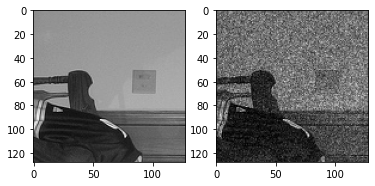

In [55]:
plt.subplot(121), plt.imshow(A1, 'gray')
plt.subplot(122), plt.imshow(B1, 'gray')

In [56]:
from network import CADET

In [57]:
model = CADET(in_channels=1, wf=63)

In [58]:
tmp = model(B)

In [59]:
tmp.shape

torch.Size([64, 1, 128, 128])

In [1]:
import cv2 as cv
import numpy as np
from skimage import img_as_float32, img_as_ubyte
path = "TestMethods/data/JPEGImages/2008_000005.jpg"

In [3]:
gt = cv.imread(path, 1)[:, :, ::-1]
gt = gt.astype(np.float32)
gt.min(), gt.max()

(13.0, 255.0)

In [4]:
# 转为灰度图像
r, g, b = gt[:, :, 0 : 1], gt[:, :, 1 : 2], gt[:, :, 2 : 3]
gt = r * 0.299 + g * 0.587 + b * 0.114
gt.shape, gt.min(), gt.max()

((375, 500, 1), 38.076, 254.413)

In [5]:
gt = gt[:, :, 0]
gt.min(), gt.max()

(38.076, 254.413)

In [5]:
gt_0 = img_as_float32(cv.imread(path, 1))

In [7]:
gt_0.min(), gt_0.max()

(0.050980397, 1.0)

In [8]:
gt_1 = img_as_float32(gt)
gt_1.min(), gt_1.max()

(38.076, 254.413)

In [28]:
import glob
import cv2 as cv
import numpy as np
import DataTools as Tool

In [29]:
image_list = [path for path in glob.glob("TestMethods\\data\\JPEGImages\\*.jpg")]
len(image_list)

4336

In [31]:
Note = []
for path in image_list:
    img = cv.imread(path)[:, :, ::]
    h, w, c = img.shape
    if img.max() == 0 :
        Note.append(path)
    if h <= 128 or w <= 128 :
        Note.append(path)

In [32]:
len(Note)

0